<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


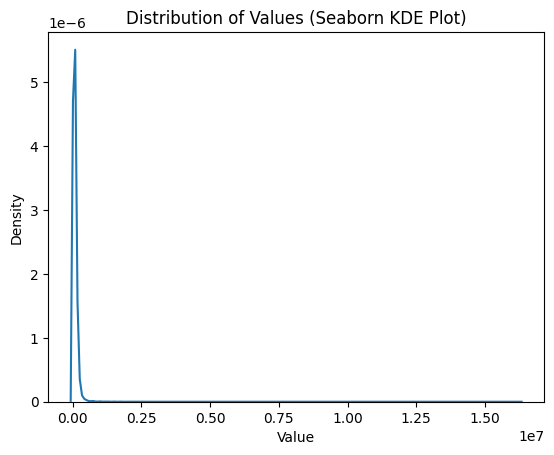

In [5]:
## Write your code here
##Write your code here
nonadf = df.dropna(subset=['ConvertedCompYearly'])
nonadf

# Plot the distribution using seaborn's kdeplot
sns.kdeplot(nonadf['ConvertedCompYearly'])
plt.title('Distribution of Values (Seaborn KDE Plot)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

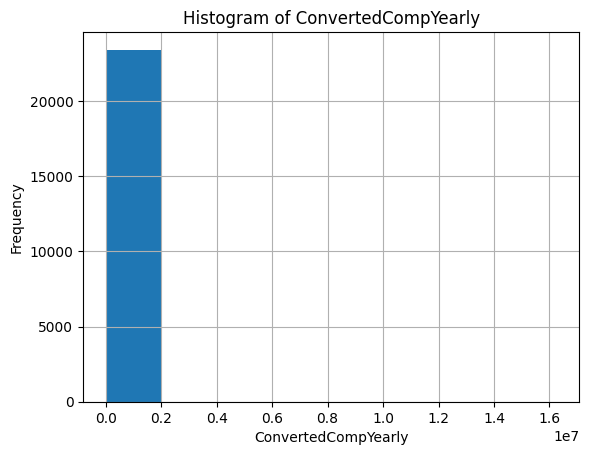

In [7]:
nonadf['ConvertedCompYearly'].hist(bins=8) # You can adjust the number of bins as needed

plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [11]:
## Write your code here
df_exploded = nonadf.assign(Employment=nonadf['Employment'].str.split(';')).explode('Employment')

df_exploded['Employment'].unique() 

empdf = df_exploded.loc[df_exploded.Employment == 'Employed, full-time']
empdf.ConvertedCompYearly.median()

np.float64(67666.0)

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [12]:
## Write your code here
nonadf.Country = nonadf.Country.str.lower() 

country_dict = {'united states of america': 'usa', 
                'united kingdom of great britain and northern ireland' : 'uk', 
                'iran, islamic republic of...' : 'iran',
                'republic of north macedonia' : 'north macedonia',
                'russian federation' : 'russia', 
                'united republic of tanzania' : 'tanzania', 
                'venezuela, bolivarian republic of...' : 'venezuela',
                'republic of moldova' : 'moldova', 
                'united arab emirates' : 'uae', 
                'hong kong (s.a.r.)' : 'hong kong',   
                "lao people's democratic republic" : 'laos', 
                'democratic republic of the congo' : 'dr congo',
                'syrian arab republic': 'syria', 
                "côte d'ivoire" : 'cdi', 
                "democratic people's republic of korea" : 'north korea',
                'congo, republic of the...' : 'congo',  
                'libyan arab jamahiriya' : 'libya', 
                'brunei darussalam' : 'brunei',  
                'micronesia, federated states of...' : 'micronesia',
               'republic of korea' : 'south korea',
               'dominica' : 'dominican republic'}  
                

nonadf.loc[nonadf.Country == 'viet nam', 'Country'] = 'vietnam'
nonadf['Country'] = nonadf['Country'].replace(country_dict)
nonadf.Country.unique()

/tmp/ipykernel_2599/366169083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonadf.Country = nonadf.Country.str.lower()
/tmp/ipykernel_2599/366169083.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonadf['Country'] = nonadf['Country'].replace(country_dict)


array(['pakistan', 'austria', 'turkey', 'france', 'usa', 'uk', 'bulgaria',
       'greece', 'brazil', 'germany', 'italy', 'ukraine', 'russia',
       'south africa', 'czech republic', 'canada', 'iran',
       'dominican republic', 'switzerland', 'belgium', 'peru', 'bolivia',
       'morocco', 'india', 'luxembourg', 'georgia', 'saudi arabia',
       'ireland', 'romania', 'spain', 'cyprus', 'paraguay', 'lithuania',
       'netherlands', 'slovenia', 'singapore', 'venezuela', 'japan',
       'latvia', 'sweden', 'costa rica', 'poland', 'norway', 'portugal',
       'finland', 'israel', 'nicaragua', 'serbia', 'croatia', 'hungary',
       'bangladesh', 'indonesia', 'denmark', 'bosnia and herzegovina',
       'mexico', 'philippines', 'thailand', 'slovakia', 'el salvador',
       'ecuador', 'argentina', 'algeria', 'kazakhstan', 'malaysia',
       'zimbabwe', 'afghanistan', 'malta', 'belarus', 'colombia', 'egypt',
       'montenegro', 'australia', 'isle of man', 'new zealand',
       'palestine',

In [13]:
nalist = ['usa', 'canada', 'mexico']
salist = ['brazil', 'argentina', 'dominican republic', 'peru', 'bolivia', 'paraguay', 'venezuela', 'costa rica', 'el salvador',
          'colombia', 'cuba', 'bahamas', 'panama', 'chile', 'nicaragua', 'guyana', 'suriname', 'belize']
eulist = ['uk', 'norway', 'serbia', 'poland', 'bulgaria', 'switzerland', 'germany', 'ireland', 'italy', 'ukraine', 'austria',
          'france', 'romania', 'turkey', 'sweden', 'netherlands', 'croatia', 'czech republic', 'north macedonia', 'finland', 'slovakia',
       'russia', 'greece', 'israel', 'belgium','hungary', 'portugal', 'latvia', 'spain', 'lithuania', 'kosovo', 
          'georgia', 'san marino', 'liechtenstein', 'denmark', 'albania','luxembourg', 'montenegro', 'cyprus', 'slovenia', 'bosnia and herzegovina',
         'estonia', 'malta', 'belarus', 'moldova', 'armenia', 'monaco', 'iceland', 'andorra']
asialist = ['uzbekistan', 'philippines', 'india', 'japan', 'iran', 'saudi arabia', 'nepal', 'pakistan','sri lanka', 'china', 'singapore', 'lebanon', 'vietnam', 'indonesia', 'taiwan', 
           'bangladesh', 'malaysia', 'azerbaijan', 'kazakhstan','myanmar', 'south korea', 'afghanistan', 'palestine''uae', 'maldives', 'hong kong', 'laos', 'mongolia', 'cambodia',
           'syria', 'iraq','kyrgyzstan', 'kuwait','tajikistan','north korea', 'oman', 'qatar', 'bahrain', 'libya', 'brunei', 'bhutan'] 
oceanialist = ['australia','new zealand', 'trinidad and tobago', 'papua new guinea', 'samoa', 'micronesia', 'nauru']
africalist = ['algeria', 'tanzania', 'south africa', 'tunisia', 'nigeria', 'ghana', 'egypt', 'jordan', 'thailand', 'rwanda', 'benin', 'zimbabwe', 'ethiopia', 'uganda',
             'mauritius', 'kenya','gabon', 'madagascar', 'angola', 'dr congo', 'namibia', 'senegal', 'zambia', 'swaziland', 'cdi','burundi', 'mauritania', 'sierra leone', 'somalia',
             'togo','sudan','cameroon','yemen', 'malawi','burkina faso', 'congo', 'botswana', 'guinea-bissau', 'mozambique','central african republic', 'equatorial guinea','cape verde',
             'guinea','niger', 'mali', 'lesotho', 'liberia', 'chad', 'djibouti'] 
islandlist = ['isle of man', 'saint kitts and nevis', 'fiji', 'bahamas', 'barbados', 'antigua and barbuda','haiti', 'solomon islands']

In [14]:
# Create a dictionary mapping each country to its continent
continent_map = {}

for c in nalist:
    continent_map[c] = 'North America'
for c in salist:
    continent_map[c] = 'South America'
for c in eulist:
    continent_map[c] = 'Europe'
for c in asialist:
    continent_map[c] = 'Asia'
for c in africalist:
    continent_map[c] = 'Africa'
for c in oceanialist:
    continent_map[c] = 'Oceania'
for c in islandlist:
    continent_map[c] = 'Oceania'  

# Map the continent to the dataframe
nonadf['Continent'] = nonadf['Country'].map(continent_map)
nonadf

/tmp/ipykernel_2599/537166854.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonadf['Continent'] = nonadf['Country'].map(continent_map)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Continent
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,Asia
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,Europe
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,Europe
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,Europe
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN,Europe
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0,North America
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN,North America
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,25.0,15.0,5.0,5.0,0.0,Appropriate in length,Easy,12000.0,3.0,North America


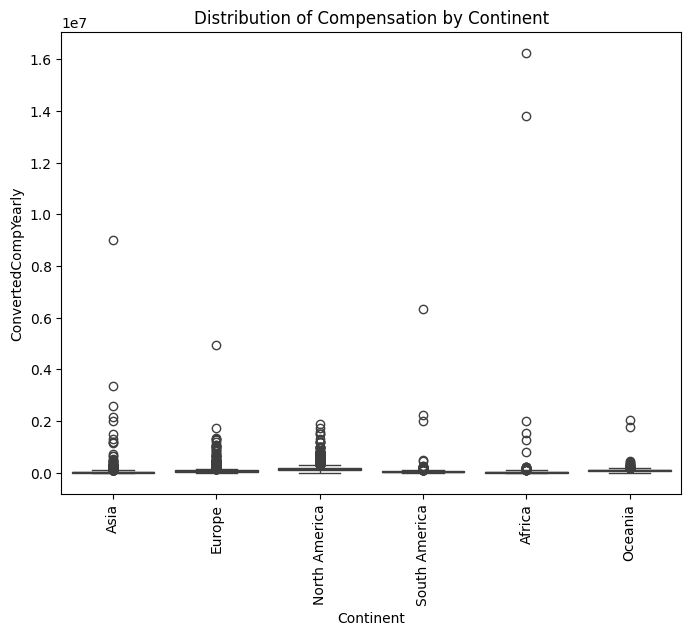

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Continent", y="ConvertedCompYearly", data=nonadf)
plt.xticks(rotation=90, ha='center') 
plt.title("Distribution of Compensation by Continent")
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [18]:
## Write your code here
compstats = nonadf.ConvertedCompYearly.describe().reset_index()
compstats.columns = ['stats', 'value']
compstats

stdev = compstats.value.loc[compstats.stats == 'std'].values[0]

nonadf = nonadf.loc[nonadf.ConvertedCompYearly <= ((3 * stdev) + nonadf.ConvertedCompYearly.mean())]
nonadf

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Continent
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,Asia
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,Europe
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,Europe
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,Europe
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN,Europe
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0,North America
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN,North America
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,25.0,15.0,5.0,5.0,0.0,Appropriate in length,Easy,12000.0,3.0,North America


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


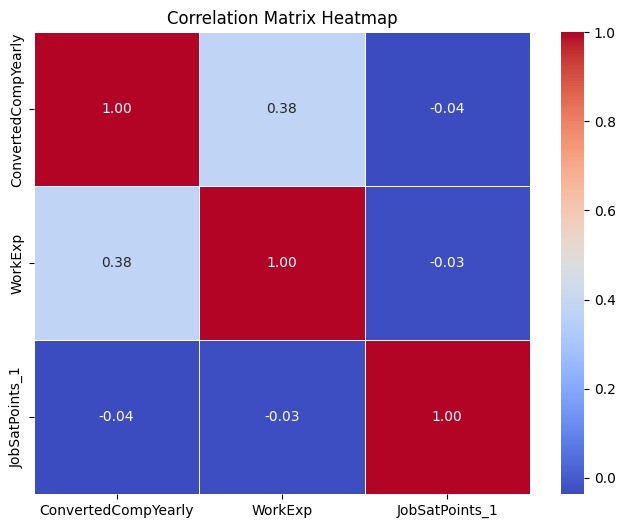

In [20]:
## Write your code here
keyvariables = nonadf[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]
correlations = keyvariables.corr() 

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


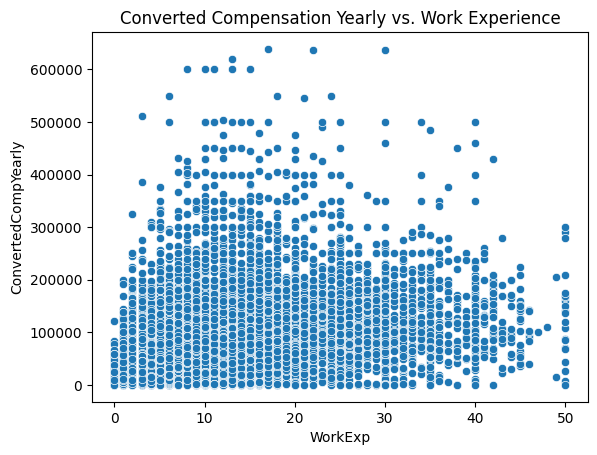

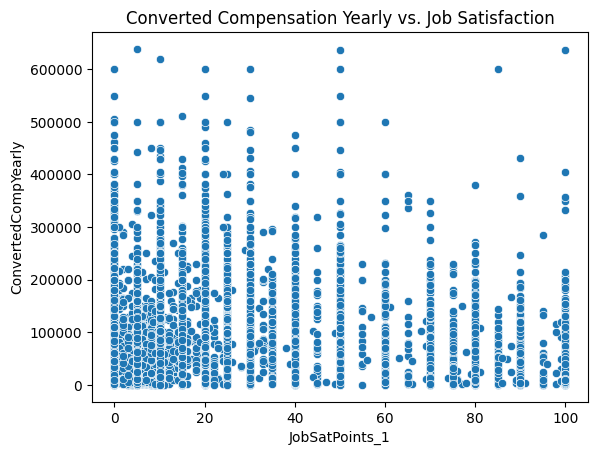

In [25]:
## Write your code here
# Scatter plot with hue for 'time'
sns.scatterplot(data=keyvariables, y="ConvertedCompYearly", x="WorkExp")
plt.title("Converted Compensation Yearly vs. Work Experience")
plt.ylabel("ConvertedCompYearly")
plt.xlabel("WorkExp")
plt.show()

# Scatter plot with hue and style for 'smoker'
sns.scatterplot(data=keyvariables, y="ConvertedCompYearly", x="JobSatPoints_1")
plt.title("Converted Compensation Yearly vs. Job Satisfaction")
plt.ylabel("ConvertedCompYearly")
plt.xlabel("JobSatPoints_1")
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
